In [1]:
import math
import numpy as np
import pandas as pd

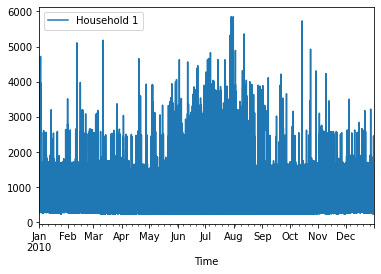

In [3]:
df = pd.read_csv('../data/Residential-Profiles.csv')
df['Time'] = df['Time'].astype('datetime64')
df.plot(x='Time', y='Household 1')
houses = ["Household " + str(num) for num in range(1, 201)]

In [ ]:
#building block
#Grid search
PEAK_VALUES = [6000, 7000, 8000, 9000, 10000]
epsilons = [0.1, 0.25, 0.5, 0.75, 1]
trials = [1,2,3,4,5]
print("********************************")
print("Grid Search on progress")
print("5 trials with epsilon values [0.1, 0.25, 0.5, 0.75, 1] and PEAK_VALUES of [6000, 7000, 8000, 9000, 10000]")
print("Take average of 5 iterations")
print("********************************")
print("Prining relative errors...")
for PEAK_VALUE in PEAK_VALUES:
    for epsilon in epsilons:
        for trial in trials:
            #epsilon=1
            #PEAK_VALUE=8000 
            EX = 0
            total_relative_error = 0

            for house in houses:
                for timestamps in range(df.shape[0]):
                    energy = df.at[timestamps,house]

                    maxAllowedError = energy * 10 / 100
                    sgd = maxAllowedError / 2.33
                    sensitivity = math.sqrt((sgd*sgd) / 2)

                    #laplace noise
                    lap_noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
                    noisy_energy = energy + lap_noise + EX
                    if noisy_energy > PEAK_VALUE:
                        EX = noisy_energy - PEAK_VALUE
                        noisy_energy = PEAK_VALUE

                    relative_error = abs(energy-noisy_energy)/energy
                    total_relative_error += relative_error
            
            avg_relative_error = total_relative_error*100/(df.shape[0]*200)
            print("PEAK value: ", PEAK_VALUE , " ; epsilon: ", epsilon, "; iteration: ", trial, "; error: ", avg_relative_error)
            

********************************
Grid Search on progress
5 trials with epsilon values [0.1, 0.25, 0.5, 0.75, 1] and PEAK_VALUES of [6000, 7000, 8000, 9000, 10000]
Take average of 5 iterations
********************************
Prining relative errors...
PEAK value:  6000  ; epsilon:  0.1 ; iteration:  1 ; error:  107.7860570587423
PEAK value:  6000  ; epsilon:  0.1 ; iteration:  2 ; error:  107.51169069821948
